In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

path_train = 'data/train_data.npy'
path_test = 'data/test_data.npy'
path_test_label = 'data/test_labels.npy'

train = np.load(path_train)
test = np.load(path_test)
test_labels = np.load(path_test_label)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train)

In [5]:
import os

# Apply KMeans clustering
# Set the LOKY_MAX_CPU_COUNT environment variable to the desired number of cores 
os.environ['LOKY_MAX_CPU_COUNT'] = '10'

n_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [6]:
# Calculate the distance of each point to its nearest cluster center
distances = kmeans.transform(data_scaled).min(axis=1)

# Set a threshold for anomalies (e.g., top 5% of the distances)
threshold = np.percentile(distances, 95)

# Identify anomalies
anomalies = distances > threshold

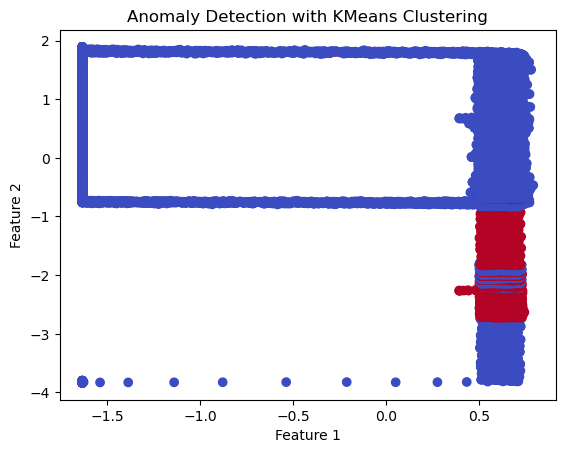

Number of anomalies detected: 24750


In [8]:
# Plot the results

# TODO this is nonsensical, there are more than 2 dimensions
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=anomalies, cmap='coolwarm', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection with KMeans Clustering')
plt.show()

print(f"Number of anomalies detected: {np.sum(anomalies)}")